# Домашнее задание

# 1 - Уменьшение палитры изображения (суммарно 6 баллов)
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Задание оценивает в 5 баллов.

Еще 1 балл даётся за запуск алгоритма на выбранных вами картинках - на них результат должен получиться красивым.

Вот вам вспомогательные функции для считывания и вывода изображений:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2 # нужно поставить себе cv2 через conda install opencv

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

def grid_pict(images, n, lst, nrows = 2, ncols = 2): # дополнительная функция для отрисовки нескольких изображений
  plt.figure(figsize=(10, 7))
  for index in range(n):
    plt.subplot(nrows, ncols, index + 1)
    b, g, r = cv2.split(images[index])
    new_image = cv2.merge([r, g, b])
    plt.axis('off')
    plt.title('k = {}'.format(lst[index][0]))
    plt.imshow(new_image)

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

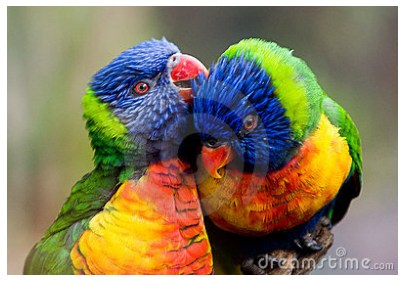

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Тинькофф.Поколение/two-lorikeet-birds-2293918.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

In [ ]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3
# вам скорее все кстати понадобится сделать reshape, чтобы перейти от 275x400 к одномерному массиву пикселей

(450, 675, 3)


In [ ]:
sns.set_theme() # seaborn выглядит поэстетичнее

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from skimage.metrics import structural_similarity

KMeans.

In [ ]:
def km_color(img, k):
  img_data = np.copy(img)
  img_data = np.reshape(img_data, (-1, 3))
  km = KMeans(k)
  preds = km.fit_predict(img_data)

  for i in range(k):
    img_data[preds == i] = km.cluster_centers_[i]

  img_data = np.reshape(img_data, img.shape)
  return img_data

In [ ]:
km_lst = []
km_img = []
for i in [2, 3, 10, 20]:
  img_data = km_color(img, k=i)
  acc = structural_similarity(img_data, img, multichannel=True)
  km_img.append(img_data)
  km_lst.append((i, acc))

km_img = np.array(km_img)
print("Полученный список (k, SSIM):")
km_lst

Полученный список (k, SSIM):


[(2, 0.5334921736948373),
 (3, 0.5634464576254669),
 (10, 0.6784822582327972),
 (20, 0.7560985522538951)]

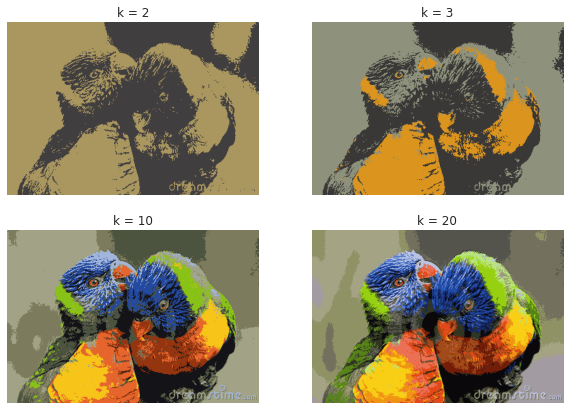

In [ ]:
grid_pict(km_img, 4, km_lst)

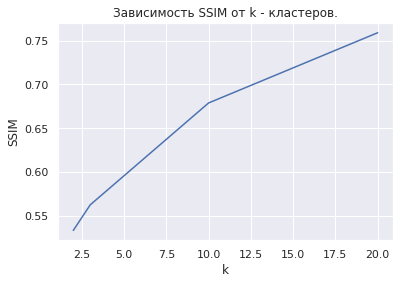

In [ ]:
plt.plot(list(map(lambda x: x[0], km_lst)), list(map(lambda x: x[1], km_lst)))
plt.title('Зависимость SSIM от k - кластеров.')
plt.xlabel('k')
plt.ylabel('SSIM')
plt.show()

DBSCAN.

In [ ]:
def dbs_color(img, eps, k):
  img_data = np.copy(img)
  img_data = np.reshape(img_data, (-1, 3))
  dbs = DBSCAN(eps=eps, min_samples=k)
  preds = dbs.fit_predict(img_data)
  
  for i in range(len(preds)):
    img_data[preds == i] = np.median(img_data[preds == i], axis = 0)

  img_data = np.reshape(img_data, img.shape)
  return img_data

In [ ]:
dbs_lst = []
dbs_img = []
for i in [2, 3, 10, 20]:
  img_data = dbs_color(img, eps=3, k=i)
  acc = structural_similarity(img_data, img, multichannel=True)
  dbs_lst.append((i, acc))
  dbs_img.append(img_data)

dbs_img = np.array(dbs_img)

In [ ]:
print("Полученный список (k, SSIM):")
dbs_lst

Полученный список (k, SSIM):


[(2, 0.690964870880865),
 (3, 0.6910256778565818),
 (10, 0.8704426413324118),
 (20, 0.9273302943295239)]

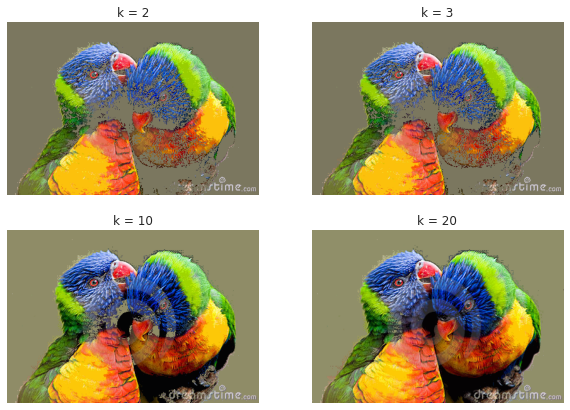

In [ ]:
grid_pict(dbs_img, 4, dbs_lst)

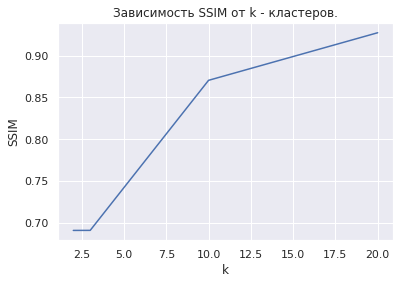

In [ ]:
plt.title('Зависимость SSIM от k - кластеров.')
plt.plot(list(map(lambda x: x[0], dbs_lst)), list(map(lambda x: x[1], dbs_lst)))
plt.xlabel('k')
plt.ylabel('SSIM')
plt.show()

AgglomerativeClustering.

In [ ]:
def agg_color(img, k):  # приходится понижать размерность, чтобы не превышать лимит по памяти
  img_data = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_CUBIC) 
  img_data = np.reshape(img_data, (-1, 3))
  agg = AgglomerativeClustering(k)
  preds = agg.fit_predict(img_data)

  for i in range(len(preds)):
    img_data[preds == i] = np.median(img_data[preds == i], axis = 0)

  img_data = np.reshape(img_data, (150, 150, 3))
  return img_data

In [ ]:
res_img = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
agg_lst = []
agg_img = []
for i in [2, 3, 10, 20]:
  img_data = agg_color(img, k=i)
  acc = structural_similarity(img_data, res_img, multichannel=True)
  agg_lst.append((i, acc))
  agg_img.append(img_data)

agg_img = np.array(agg_img)

In [ ]:
print("Полученный список (k, SSIM):")
agg_lst

Полученный список (k, SSIM):


[(2, 0.4586829333871612),
 (3, 0.48879882380554635),
 (10, 0.6763421218535903),
 (20, 0.7631986325692686)]

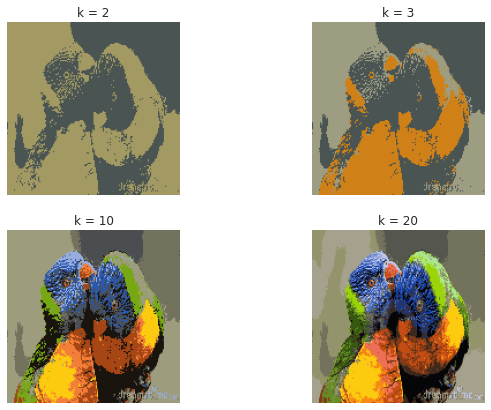

In [ ]:
grid_pict(agg_img, 4, agg_lst)

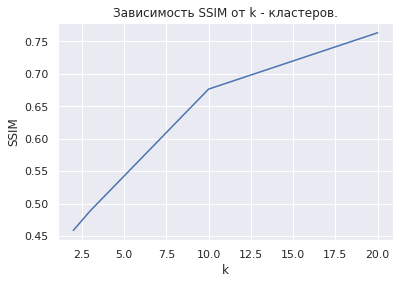

In [ ]:
plt.title('Зависимость SSIM от k - кластеров.')
plt.plot(list(map(lambda x: x[0], agg_lst)), list(map(lambda x: x[1], agg_lst)))
plt.xlabel('k')
plt.ylabel('SSIM')
plt.show()

По метрике SSIM лучший результат - ~0.93, алгоритм DBSCAN, `min_samples = 20` (минимальное количество кластеров).

Однако визуально мне больше всего понравился результат работы KMeans, поэтому именно на нем я буду проверять выбранные картинки.

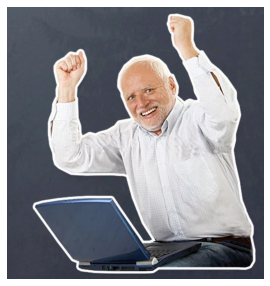

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Тинькофф.Поколение/e40424b1d4d3cadc5bdd816f340a1a22.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

In [ ]:
km_lst = []
km_img = []
for i in [2, 3, 10, 20]:
  img_data = km_color(img, k=i)
  acc = structural_similarity(img_data, img, multichannel=True)
  km_img.append(img_data)
  km_lst.append((i, acc))

km_img = np.array(km_img)
print("Полученный список (k, SSIM):")
km_lst

Полученный список (k, SSIM):


[(2, 0.7660769718338619),
 (3, 0.8104956502840864),
 (10, 0.8809302214681932),
 (20, 0.9304485693492204)]

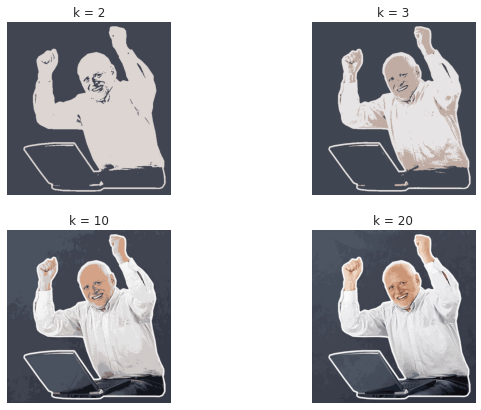

In [ ]:
grid_pict(km_img, 4, km_lst)

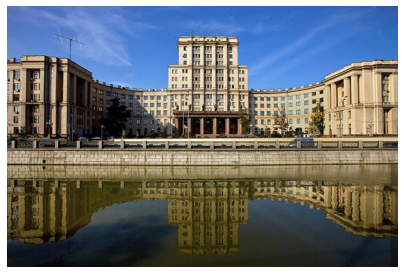

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Тинькофф.Поколение/mgtu-2.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

In [ ]:
km_lst = []
km_img = []
for i in [2, 3, 10, 20]:
  img_data = km_color(img, k=i)
  acc = structural_similarity(img_data, img, multichannel=True)
  km_img.append(img_data)
  km_lst.append((i, acc))

km_img = np.array(km_img)
print("Полученный список (k, SSIM):")
km_lst

Полученный список (k, SSIM):


[(2, 0.6003917643411113),
 (3, 0.6302387564383659),
 (10, 0.8392136588457548),
 (20, 0.8851821730658326)]

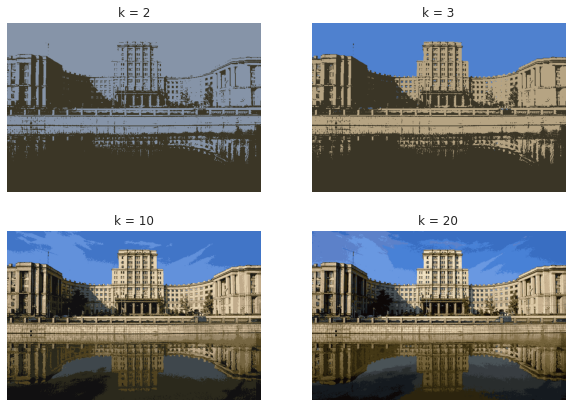

In [ ]:
grid_pict(km_img, 4, km_lst)

# 2 - Уменьшение размерности помогает классификации лиц (суммарно 6 баллов)

Используя методы уменьшения размерности признаков, решите с максимальным **accuracy** задачу классификации лиц знаменитостей (датасет старый, неудивительно, если вы из всех знаменитостей будете знать только Буша и Шварценнегера).

Попробуйте добиться максимального accuracy (2 балла)
* без уменьшения размерности
* с уменьшением размерности

Возможно без уменьшения размерности у вас даже просто не получится дождаться времени работы на 11750 признаках. Я слышал у кого-то получилось, у меня нет.

Сравните ваш результат с константным предсказанием "всегда самый популярный класс". Делает ли ваша модель какой-то значительный прогресс? (1 балл)

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ. (1 балл)

Напишите, каким алгоритмом вы воспользовались (PCA или TSNE), почему не другим? Обоснуйте ответ. (1 балл)

Визуализируйте датасет на плоскости. Подпишите несколько самых больших классов именами людей. Чем вы воспользуетесь, PCA или TSNE? Обоснуйте ответ (1 балл)

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
# эту строчку менять нельзя, ресайзить нельзя

In [ ]:
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
# эту строчку тоже менять нельзя'

In [ ]:
X.shape, y.shape # 2370 лиц, каждый из них представляется вектором размера 11750

((2370, 11750), (2370,))

In [ ]:
names[8] # в y лежат номера, а names переводит номер в имя

'George W Bush'

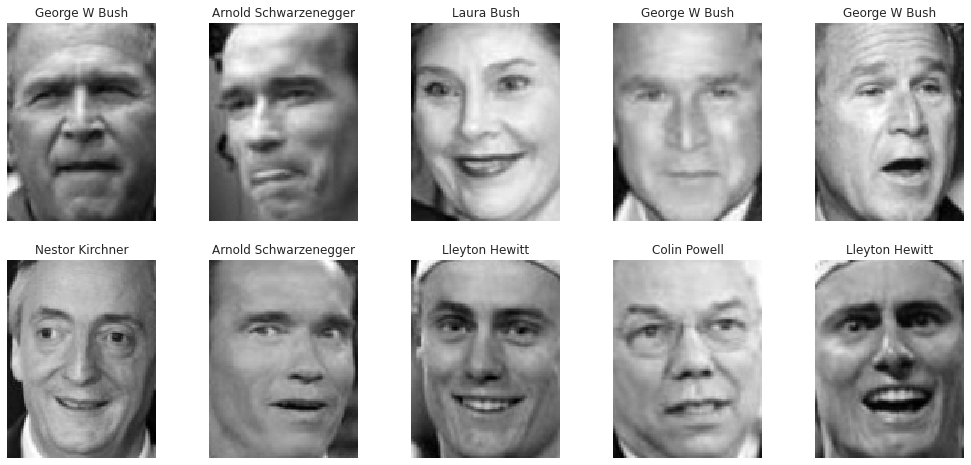

In [ ]:
import matplotlib.pyplot as plt
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц

Результат без уменьшения размерности на Логистической Регрессии.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
preds = log_reg.predict(X_test)
accuracy_score(y_test, preds)

0.6729957805907173

In [ ]:
best_lst = []
for i in np.arange(0.5, 2.6, 0.1):
  log_reg = LogisticRegression(C=i, random_state=42)
  log_reg.fit(X_train, y_train)
  preds = log_reg.predict(X_test)
  best_lst.append((i, accuracy_score(y_test, preds)))

best_lst

[(0.5, 0.6835443037974683),
 (0.6, 0.6772151898734177),
 (0.7, 0.679324894514768),
 (0.7999999999999999, 0.6835443037974683),
 (0.8999999999999999, 0.689873417721519),
 (0.9999999999999999, 0.6729957805907173),
 (1.0999999999999999, 0.6856540084388185),
 (1.1999999999999997, 0.6877637130801688),
 (1.2999999999999998, 0.6877637130801688),
 (1.4, 0.6835443037974683),
 (1.4999999999999998, 0.6877637130801688),
 (1.5999999999999996, 0.6856540084388185),
 (1.6999999999999997, 0.6856540084388185),
 (1.7999999999999998, 0.6835443037974683),
 (1.8999999999999997, 0.6983122362869199),
 (1.9999999999999996, 0.689873417721519),
 (2.0999999999999996, 0.689873417721519),
 (2.1999999999999997, 0.6835443037974683),
 (2.3, 0.689873417721519),
 (2.3999999999999995, 0.6877637130801688),
 (2.4999999999999996, 0.689873417721519)]

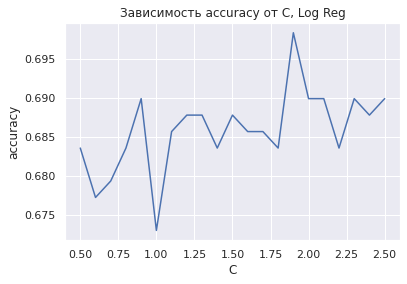

In [ ]:
plt.plot(list(map(lambda x: x[0], best_lst)), list(map(lambda x: x[1], best_lst)))
plt.title('Зависимость accuracy от C, Log Reg')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()

In [ ]:
list(sorted(best_lst, key=lambda x: x[1]))[-1] # лучший результат

(1.8999999999999997, 0.6983122362869199)

KNN дает точность намного хуже, чем ЛГ. Даже с перебором гиперпараметров. Поэтому дальше не будем рассматривать KNN вовсе.

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
accuracy_score(y_test, preds)

0.4240506329113924

In [ ]:
best_lst = []
for i in [4, 5, 7, 10, 15, 25]:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  preds = knn.predict(X_test)
  best_lst.append((i, accuracy_score(y_test, preds)))

best_lst

[(4, 0.4029535864978903),
 (5, 0.4240506329113924),
 (7, 0.43670886075949367),
 (10, 0.4409282700421941),
 (15, 0.41983122362869196),
 (25, 0.3755274261603376)]

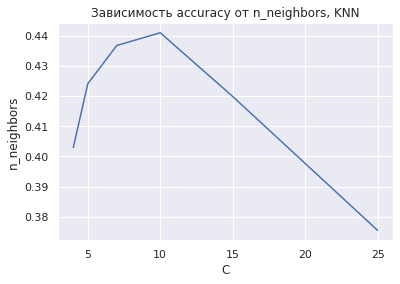

In [ ]:
plt.plot(list(map(lambda x: x[0], best_lst)), list(map(lambda x: x[1], best_lst)))
plt.title('Зависимость accuracy от n_neighbors, KNN')
plt.xlabel('C')
plt.ylabel('n_neighbors')
plt.show()

Результат работы наивного алгоритма (предсказание самого популярного класса). Наивный алгоритм однозначно проигрывает в точности и KNN, и Лог. Рег. (~0.2 против ~0.4/0.7).

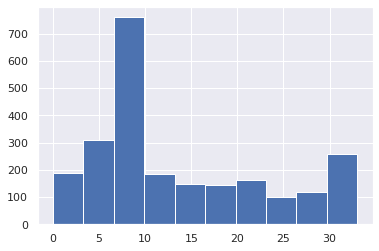

In [ ]:
plt.hist(y) # распределение классов
plt.show()

In [ ]:
np.bincount(y).argmax() # номер самого популярного класса

8

In [ ]:
class NaiveAlgorithm():
  def fit(self, X, y):
    pass

  def predict(self, y):
    return np.full(y.shape, 8)

In [ ]:
naiv_alg = NaiveAlgorithm()
naiv_alg.fit(X_train, y_train)
preds_na = naiv_alg.predict(y_test)
accuracy_score(y_test, preds_na) # лучший результат

0.23839662447257384

Теперь с понижением размерности. 
Для начала попробуем PCA.
Подберем оптимальную размерность для алгоритма.

In [ ]:
lst = []
for i in [2, 3, 4, 5, 10, 20, 50, 100, 200, 500, 1000, 1800]:
  pca = PCA(n_components=i, random_state=42)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  log_reg.fit(X_train_pca, y_train)
  preds = log_reg.predict(X_test_pca)
  lst.append((i, accuracy_score(y_test, preds)))

lst

[(2, 0.2320675105485232),
 (3, 0.2320675105485232),
 (4, 0.2616033755274262),
 (5, 0.25738396624472576),
 (10, 0.37130801687763715),
 (20, 0.4620253164556962),
 (50, 0.5928270042194093),
 (100, 0.5843881856540084),
 (200, 0.6518987341772152),
 (500, 0.6919831223628692),
 (1000, 0.7109704641350211),
 (1800, 0.7130801687763713)]

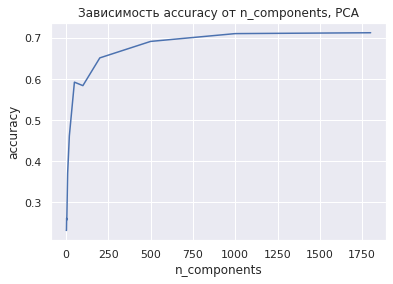

In [ ]:
plt.plot(list(map(lambda x: x[0], lst)), list(map(lambda x: x[1], lst)))
plt.title('Зависимость accuracy от n_components, PCA')
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.show()

In [ ]:
list(sorted(lst, key=lambda x: x[1]))[-1] # лучший результат при подобранном n_components

(1800, 0.7130801687763713)

Подберем оптимальный гиперпараметр C для Лог. Регрессии, трансформируем датасет до полученной оптимальной размерности (PCA).

In [ ]:
pca = PCA(n_components=list(sorted(lst, key=lambda x: x[1]))[-1][0], random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
best_lst = []
for i in np.arange(0.5, 2.6, 0.1):
  log_reg = LogisticRegression(C=i, random_state=42)
  log_reg.fit(X_train_pca, y_train)
  preds = log_reg.predict(X_test_pca)
  best_lst.append((i, accuracy_score(y_test, preds)))

best_lst

[(0.5, 0.7151898734177216),
 (0.6, 0.7130801687763713),
 (0.7, 0.7130801687763713),
 (0.7999999999999999, 0.7151898734177216),
 (0.8999999999999999, 0.7194092827004219),
 (0.9999999999999999, 0.7130801687763713),
 (1.0999999999999999, 0.7130801687763713),
 (1.1999999999999997, 0.7130801687763713),
 (1.2999999999999998, 0.7151898734177216),
 (1.4, 0.7088607594936709),
 (1.4999999999999998, 0.7130801687763713),
 (1.5999999999999996, 0.7109704641350211),
 (1.6999999999999997, 0.7067510548523207),
 (1.7999999999999998, 0.7109704641350211),
 (1.8999999999999997, 0.7151898734177216),
 (1.9999999999999996, 0.7109704641350211),
 (2.0999999999999996, 0.7130801687763713),
 (2.1999999999999997, 0.7088607594936709),
 (2.3, 0.7088607594936709),
 (2.3999999999999995, 0.7130801687763713),
 (2.4999999999999996, 0.7130801687763713)]

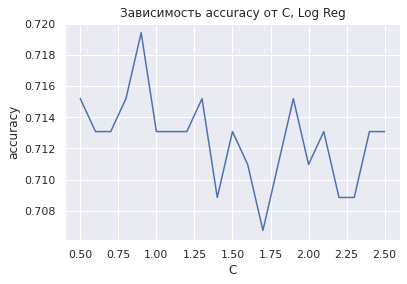

In [ ]:
plt.plot(list(map(lambda x: x[0], best_lst)), list(map(lambda x: x[1], best_lst)))
plt.title('Зависимость accuracy от C, Log Reg')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()

In [ ]:
list(sorted(best_lst, key=lambda x: x[1]))[-1] # лучший результат с подобранными C (Лог. Рег.) и n_components (PCA)

(0.8999999999999999, 0.7194092827004219)

Теперь попробуем TSNE. Подберем оптимальную размерность для алгоритма. 

(Мда, TSNE проигрывает по точности и KNN, и Лог. Рег.).

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
lst = []
for i in [1, 2, 3]:
  tsne = TSNE(n_components=i)
  X_train_tsne = tsne.fit_transform(X_train)
  X_test_tsne = tsne.fit_transform(X_test)
  log_reg = LogisticRegression()
  log_reg.fit(X_train_tsne, y_train)
  preds = log_reg.predict(X_test_tsne)
  lst.append((i, accuracy_score(y_test, preds)))

lst

[(1, 0.23839662447257384), (2, 0.23839662447257384), (3, 0.08860759493670886)]

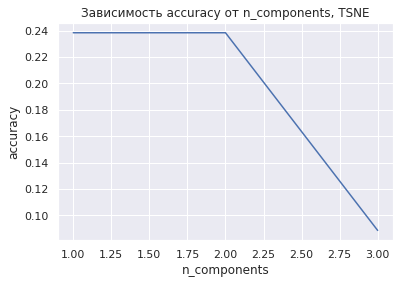

In [ ]:
plt.plot(list(map(lambda x: x[0], lst)), list(map(lambda x: x[1], lst)))
plt.title('Зависимость accuracy от n_components, TSNE')
plt.xlabel('n_components')
plt.ylabel('accuracy')
plt.show()

Визуализируем несколько классов из датасета с применением TSNE, так как данный алгоритм наиболее пригоден для визуализации данных путем понижения размерности признаков до 2. Тем не менее, из-за большого количества признаков (11 тысяч) получилось не очень(

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

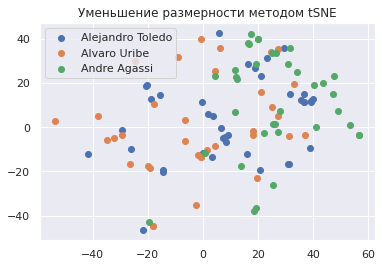

In [ ]:
fig, ax = plt.subplots()
for i in range(3):
    ax.scatter(X_tsne[y == i][:, 0], X_tsne[y == i][:, 1], label=names[i])

ax.legend()
ax.grid(True)
plt.title("Уменьшение размерности методом tSNE")
plt.show()

Итого, максимальную точность дает алгоритм PCA понижением размерности до 1800 (`n_components=1800`). Модель - Логистическая Регрессия с `C=0.9`. 

In [ ]:
pca = PCA(n_components=1800, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
log_reg = LogisticRegression(C=0.9)
log_reg.fit(X_train_pca, y_train)
preds = log_reg.predict(X_test_pca)
accuracy_score(y_test, preds) # лучший результат

0.7194092827004219

Перепишем предоставленную функцию отрисовки, чтобы выводить лица из y_test и подписывать дополнительно предсказанные варианты.

In [ ]:
preds = np.array(list(enumerate(preds)))
X_img = X_test.reshape((-1, 125, 94))

In [ ]:
def plot_image(image_id, pred):
    # функция рисует изображение номер image_id
    plt.title('True: {}\nPred: {}'.format(names[y_test[image_id]], names[pred]))
    plt.imshow(255 - X_img[image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, preds, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id, preds[index])
        plt.axis('off')

Посмотрим на лица, на которых модель ошиблась.

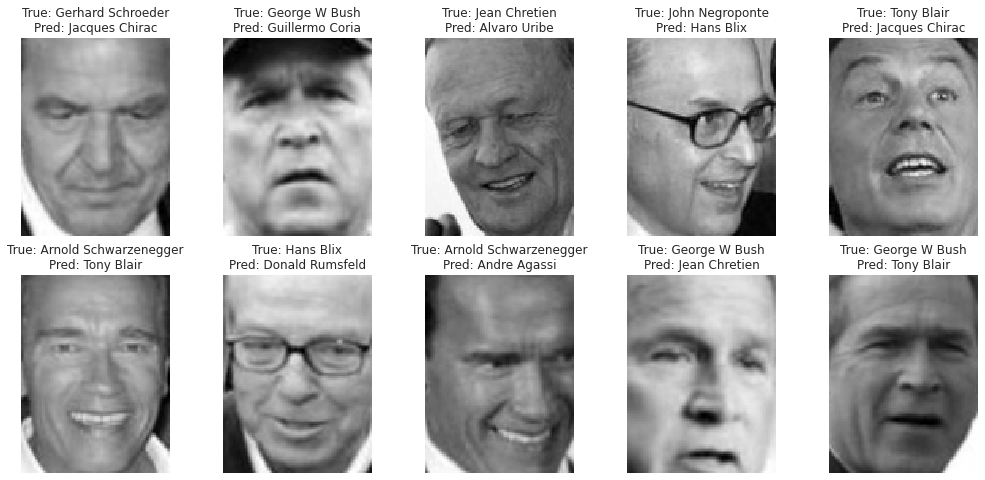

In [ ]:
plot_grid(preds[preds[:, 1] != y_test][:10][:, 0], preds[preds[:, 1] != y_test][:10][:, 1], 2, 5)

Вывод:

Лучше всего показала себя Логистическая Регрессия с гиперпараметром `C=0.9`, обученная на данных уменьшенной размерности с помощью PCA с гиперпараметром `n_components=1800`. KNN показал себя на порядок хуже. Точность Лог. Рег. на данных уменьшенной размерности с помощью TSNE практически сравнима с Наивным Алгоритмом.